# Does Price Change as MiscFeature changes?

In [17]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [19]:
raw_data = pd.read_csv('data/Ames_Housing_Price_Data.csv')

In [21]:
raw_data['Neighborhood'].unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 'MeadowV',
       'BrDale', 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
       'Sawyer', 'Crawfor', 'Greens', 'ClearCr', 'GrnHill', 'StoneBr',
       'Veenker', 'NPkVill', 'Blueste', 'Landmrk'], dtype=object)

In [23]:
raw_data.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
raw_data = raw_data[raw_data['Neighborhood'] != 'Landmrk']

In [27]:
raw_data = raw_data[raw_data['Neighborhood'] != 'GrnHill']

In [29]:
raw_data = raw_data[raw_data['Neighborhood'] != 'Greens']

In [31]:
group1 = raw_data[['MiscFeature', 'SalePrice']].groupby('MiscFeature').agg('mean')

In [32]:
group1.reset_index(inplace=True)

In [33]:
miscDF = raw_data.loc[:, ['PID','MiscFeature','MiscVal', 'SalePrice']]

In [34]:
miscDF.dropna()


,PID,MiscFeature,MiscVal,SalePrice
19,923252075,Shed,700,131250
28,534128010,Shed,350,200000
42,535425060,Othr,6500,186000
50,909176170,Shed,1512,150000
105,534275170,Gar2,15500,151500
...,...,...,...,...
2478,909101010,Shed,800,110000
2482,535382130,Shed,500,170000
2495,903231070,Shed,400,114500
2505,902406030,Gar2,4500,125000


In [35]:
miscDF_shed = miscDF[miscDF['MiscFeature'] == 'Shed']
miscDF_shed

,PID,MiscFeature,MiscVal,SalePrice
19,923252075,Shed,700,131250
28,534128010,Shed,350,200000
50,909176170,Shed,1512,150000
115,535325350,Shed,650,125000
181,903204095,Shed,600,79500
...,...,...,...,...
2467,535351050,Shed,2000,164900
2478,909101010,Shed,800,110000
2482,535382130,Shed,500,170000
2495,903231070,Shed,400,114500


[Text(0.5, 0, 'MiscVal'), Text(0, 0.5, 'SalePrice')]

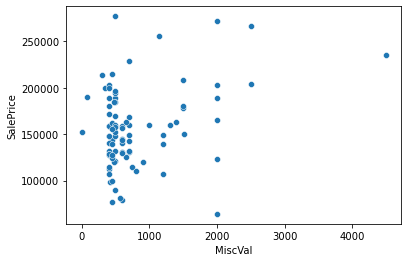

In [36]:
ax = sns.scatterplot(x=miscDF_shed['MiscVal'], y=miscDF_shed['SalePrice'])
ax.set(xlabel='MiscVal', ylabel='SalePrice')

In [37]:
grouped_misc = miscDF[['MiscFeature', 'MiscVal', 'SalePrice']].groupby(['MiscFeature']).agg(['mean', 'median'])

In [38]:
grouped_misc

MiscVal             SalePrice        
                    mean median           mean  median
MiscFeature                                           
Gar2         8760.000000   8300  147500.000000  151500
Othr         3333.333333   3500  124666.666667  133000
Shed          794.625000    500  156386.363636  152250
TenC         2000.000000   2000  250000.000000  250000

In [39]:
grouped_misc.reset_index(inplace=True)

In [40]:
grouped_misc

MiscFeature      MiscVal             SalePrice        
                      mean median           mean  median
0        Gar2  8760.000000   8300  147500.000000  151500
1        Othr  3333.333333   3500  124666.666667  133000
2        Shed   794.625000    500  156386.363636  152250
3        TenC  2000.000000   2000  250000.000000  250000

[Text(0.5, 0, 'MiscFeature'), Text(0, 0.5, 'Mean SalePrice')]

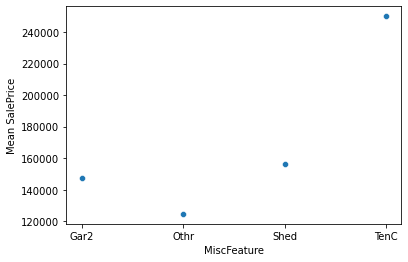

In [41]:
ax = sns.scatterplot(x=grouped_misc['MiscFeature'], y=grouped_misc['SalePrice']['mean'])
ax.set(xlabel='MiscFeature', ylabel='Mean SalePrice')

[Text(0.5, 0, 'MiscFeature'), Text(0, 0.5, 'Median SalePrice')]

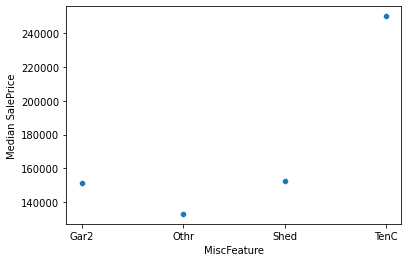

In [42]:
ax = sns.scatterplot(x=grouped_misc['MiscFeature'], y=grouped_misc['SalePrice']['median'])
ax.set(xlabel='MiscFeature', ylabel='Median SalePrice')

[Text(0.5, 0, 'SalePrice'), Text(0, 0.5, 'Misc Value')]

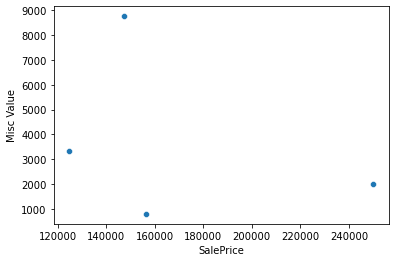

In [43]:
ax = sns.scatterplot(x=grouped_misc['SalePrice']['mean'], y=grouped_misc['MiscVal']['mean'])
ax.set(xlabel='SalePrice', ylabel='Misc Value')

In [37]:
raw_data

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2578,907192040,1842,217500,60,